In [285]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [286]:
# 1.1  파일 읽어오기
filename='../data/player_real_final.csv'
df=pd.read_csv(filename)

## 특성, 타겟 선정
- 특성 : 능력치 7개
- 타겟 : potential

In [287]:
df.position = ['FW' if 'S' in i or 'W' in i else 'MID' if 'M' in i else 'DF' if 'B' in i else 'GK'  for i in df.position]

In [288]:
df = pd.concat([df,pd.get_dummies(df.position, columns=['FW','MID','CB','GK'])], axis=1)

In [289]:
df

,name,overall,potential,value_euro,wage_eruo,player_url,player_face_url,age,height_cm,weight_kg,...,skill,movement,power,mentality,defending,goalkeeping,DF,FW,GK,MID
0,L. Messi,93,93,78000000.0,320000.0,https://sofifa.com/player/158023/lionel-messi/...,https://cdn.sofifa.net/players/158/023/22_120.png,34,170,72,...,79.000000,90.2,77.8,73.833333,28.25,10.8,0,1,0,0
1,R. Lewandowski,92,92,119500000.0,270000.0,https://sofifa.com/player/188545/robert-lewand...,https://cdn.sofifa.net/players/188/545/22_120.png,32,185,81,...,68.500000,81.6,84.8,80.666667,35.00,10.2,0,1,0,0
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,https://sofifa.com/player/20801/c-ronaldo-dos-...,https://cdn.sofifa.net/players/020/801/22_120.png,36,187,83,...,70.500000,85.4,87.2,74.333333,28.50,11.6,0,1,0,0
3,Neymar Jr,91,91,129000000.0,270000.0,https://sofifa.com/player/190871/neymar-da-sil...,https://cdn.sofifa.net/players/190/871/22_120.png,29,175,68,...,75.166667,90.2,71.8,77.000000,33.25,11.8,0,1,0,0
4,K. De Bruyne,91,91,125500000.0,350000.0,https://sofifa.com/player/192985/kevin-de-bruy...,https://cdn.sofifa.net/players/192/985/22_120.png,30,181,70,...,74.000000,80.0,81.6,82.666667,62.50,11.2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15081,D. Da Silva,47,55,90000.0,500.0,https://sofifa.com/player/259213/dylan-da-silv...,https://cdn.sofifa.net/players/259/213/22_120.png,21,175,77,...,11.666667,34.0,35.4,17.166667,10.00,46.2,0,1,0,0
15082,H. Singh,47,64,120000.0,500.0,https://sofifa.com/player/259737/haobam-singh/...,https://cdn.sofifa.net/players/259/737/22_120.png,18,170,62,...,33.500000,62.4,48.2,47.166667,41.50,12.2,0,1,0,0
15083,M. O'Brien,47,61,110000.0,500.0,https://sofifa.com/player/261667/matthew-obrie...,https://cdn.sofifa.net/players/261/667/22_120.png,18,176,71,...,34.500000,54.0,41.4,40.666667,25.25,10.8,0,1,0,0
15084,C. Porter,47,59,110000.0,500.0,https://sofifa.com/player/262040/caoimhin-port...,https://cdn.sofifa.net/players/262/040/22_120.png,19,175,70,...,36.500000,60.0,48.8,46.500000,42.25,9.4,0,1,0,0


In [290]:
ndf = df.iloc[:,-11:]

In [291]:
ndf = pd.concat([ndf,df.potential,df.overall], axis=1)

In [292]:
from sklearn.model_selection import train_test_split

In [293]:
ndf

,attacking,skill,movement,power,mentality,defending,goalkeeping,DF,FW,GK,MID,potential,overall
0,85.8,79.000000,90.2,77.8,73.833333,28.25,10.8,0,1,0,0,93,93
1,86.0,68.500000,81.6,84.8,80.666667,35.00,10.2,0,1,0,0,92,92
2,87.6,70.500000,85.4,87.2,74.333333,28.50,11.6,0,1,0,0,91,91
3,80.6,75.166667,90.2,71.8,77.000000,33.25,11.8,0,1,0,0,91,91
4,81.4,74.000000,80.0,81.6,82.666667,62.50,11.2,0,0,0,1,91,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15081,12.4,11.666667,34.0,35.4,17.166667,10.00,46.2,0,1,0,0,55,47
15082,39.2,33.500000,62.4,48.2,47.166667,41.50,12.2,0,1,0,0,64,47
15083,41.0,34.500000,54.0,41.4,40.666667,25.25,10.8,0,1,0,0,61,47
15084,43.2,36.500000,60.0,48.8,46.500000,42.25,9.4,0,1,0,0,59,47


In [294]:
fw_DF=ndf[['overall', 'attacking', 'skill', 'movement','power' ,'mentality','defending', 'FW']]

In [295]:
fw_DF

,overall,attacking,skill,movement,power,mentality,defending,FW
0,93,85.8,79.000000,90.2,77.8,73.833333,28.25,1
1,92,86.0,68.500000,81.6,84.8,80.666667,35.00,1
2,91,87.6,70.500000,85.4,87.2,74.333333,28.50,1
3,91,80.6,75.166667,90.2,71.8,77.000000,33.25,1
4,91,81.4,74.000000,80.0,81.6,82.666667,62.50,0
...,...,...,...,...,...,...,...,...
15081,47,12.4,11.666667,34.0,35.4,17.166667,10.00,1
15082,47,39.2,33.500000,62.4,48.2,47.166667,41.50,1
15083,47,41.0,34.500000,54.0,41.4,40.666667,25.25,1
15084,47,43.2,36.500000,60.0,48.8,46.500000,42.25,1


In [296]:
fw_DF['FW']

0        1
1        1
2        1
3        1
4        0
        ..
15081    1
15082    1
15083    1
15084    1
15085    1
Name: FW, Length: 15086, dtype: uint8

In [297]:
onlyFW=fw_DF['FW'] == 1
fw_DF=fw_DF[onlyFW]

In [298]:
fw_DF.corr()

,overall,attacking,skill,movement,power,mentality,defending,FW
overall,1.000000,0.504556,0.496734,0.374036,0.584292,0.566228,0.204593,NaN
attacking,0.504556,1.000000,0.930174,0.739595,0.851113,0.903612,0.312208,NaN
skill,0.496734,0.930174,1.000000,0.772185,0.767519,0.905625,0.400873,NaN
movement,0.374036,0.739595,0.772185,1.000000,0.597337,0.675359,0.230135,NaN
power,0.584292,0.851113,0.767519,0.597337,1.000000,0.838211,0.318738,NaN
mentality,0.566228,0.903612,0.905625,0.675359,0.838211,1.000000,0.564935,NaN
defending,0.204593,0.312208,0.400873,0.230135,0.318738,0.564935,1.000000,NaN
FW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [299]:
fw_DF1=fw_DF.reset_index()

In [300]:
for_fw=fw_DF1[['index', 'overall']]
for_fw

,index,overall
0,0,93
1,1,92
2,2,91
3,3,91
4,6,91
...,...,...
9585,15081,47
9586,15082,47
9587,15083,47
9588,15084,47


In [301]:
ndf

,attacking,skill,movement,power,mentality,defending,goalkeeping,DF,FW,GK,MID,potential,overall
0,85.8,79.000000,90.2,77.8,73.833333,28.25,10.8,0,1,0,0,93,93
1,86.0,68.500000,81.6,84.8,80.666667,35.00,10.2,0,1,0,0,92,92
2,87.6,70.500000,85.4,87.2,74.333333,28.50,11.6,0,1,0,0,91,91
3,80.6,75.166667,90.2,71.8,77.000000,33.25,11.8,0,1,0,0,91,91
4,81.4,74.000000,80.0,81.6,82.666667,62.50,11.2,0,0,0,1,91,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15081,12.4,11.666667,34.0,35.4,17.166667,10.00,46.2,0,1,0,0,55,47
15082,39.2,33.500000,62.4,48.2,47.166667,41.50,12.2,0,1,0,0,64,47
15083,41.0,34.500000,54.0,41.4,40.666667,25.25,10.8,0,1,0,0,61,47
15084,43.2,36.500000,60.0,48.8,46.500000,42.25,9.4,0,1,0,0,59,47


In [302]:
mid_DF=ndf[['overall', 'attacking', 'skill', 'movement', 'mentality','defending','power', 'MID']]

In [303]:
onlyMID=mid_DF['MID'] == 1
mid_DF=mid_DF[onlyMID]
mid_DF.corr()

,overall,attacking,skill,movement,mentality,defending,power,MID
overall,1.000000,0.771180,0.758052,0.366547,0.756441,0.259445,0.590860,NaN
attacking,0.771180,1.000000,0.816958,0.342569,0.671884,0.011624,0.580268,NaN
skill,0.758052,0.816958,1.000000,0.361251,0.684596,0.047423,0.455451,NaN
movement,0.366547,0.342569,0.361251,1.000000,0.059750,-0.338817,0.089093,NaN
mentality,0.756441,0.671884,0.684596,0.059750,1.000000,0.577832,0.682275,NaN
defending,0.259445,0.011624,0.047423,-0.338817,0.577832,1.000000,0.382275,NaN
power,0.590860,0.580268,0.455451,0.089093,0.682275,0.382275,1.000000,NaN
MID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
mid_DF1=mid_DF.reset_index()

In [305]:
for_mid=mid_DF1[['index', 'overall']]
for_mid

,index,overall
0,4,91
1,10,90
2,14,89
3,19,89
4,24,88
...,...,...
2471,14718,54
2472,14723,54
2473,14836,53
2474,14912,53


In [306]:
df_DF=ndf[['overall', 'skill', 'movement', 'mentality','defending','power', 'DF']]

In [307]:
df_DF

,overall,skill,movement,mentality,defending,power,DF
0,93,79.000000,90.2,73.833333,28.25,77.8,0
1,92,68.500000,81.6,80.666667,35.00,84.8,0
2,91,70.500000,85.4,74.333333,28.50,87.2,0
3,91,75.166667,90.2,77.000000,33.25,71.8,0
4,91,74.000000,80.0,82.666667,62.50,81.6,0
...,...,...,...,...,...,...,...
15081,47,11.666667,34.0,17.166667,10.00,35.4,0
15082,47,33.500000,62.4,47.166667,41.50,48.2,0
15083,47,34.500000,54.0,40.666667,25.25,41.4,0
15084,47,36.500000,60.0,46.500000,42.25,48.8,0


In [308]:
onlyDF=df_DF['DF'] == 1
df_DF=df_DF[onlyDF]
df_DF.corr()

,overall,skill,movement,mentality,defending,power,DF
overall,1.000000,0.532595,0.277973,0.718338,0.889962,0.537170,NaN
skill,0.532595,1.000000,0.586962,0.820235,0.278705,0.631930,NaN
movement,0.277973,0.586962,1.000000,0.450857,0.009895,0.299866,NaN
mentality,0.718338,0.820235,0.450857,1.000000,0.523768,0.681629,NaN
defending,0.889962,0.278705,0.009895,0.523768,1.000000,0.356212,NaN
power,0.537170,0.631930,0.299866,0.681629,0.356212,1.000000,NaN
DF,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [309]:
df_DF=df_DF.reset_index()

In [310]:
for_DF=df_DF[['index', 'overall']]
for_DF

,index,overall
0,15,89
1,22,88
2,39,87
3,42,87
4,44,87
...,...,...
2317,14755,54
2318,14764,54
2319,14843,53
2320,14943,52


In [311]:
gk_DF=ndf[['overall', 'skill', 'movement', 'mentality','defending','power','goalkeeping', 'GK']]

In [312]:
onlyGK=gk_DF['GK'] == 1
gk_DF=gk_DF[onlyGK]
gk_DF.corr()

,overall,skill,movement,mentality,defending,power,goalkeeping,GK
overall,1.000000,0.172325,0.348496,0.313807,0.131495,0.390995,0.244695,NaN
skill,0.172325,1.000000,0.792889,0.912892,0.827259,0.838678,-0.871954,NaN
movement,0.348496,0.792889,1.000000,0.807923,0.646227,0.829077,-0.615176,NaN
mentality,0.313807,0.912892,0.807923,1.000000,0.822644,0.878328,-0.752393,NaN
defending,0.131495,0.827259,0.646227,0.822644,1.000000,0.744210,-0.750840,NaN
power,0.390995,0.838678,0.829077,0.878328,0.744210,1.000000,-0.654733,NaN
goalkeeping,0.244695,-0.871954,-0.615176,-0.752393,-0.750840,-0.654733,1.000000,NaN
GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [313]:
gk_DF1=gk_DF.reset_index()
for_gk=gk_DF1[['index', 'overall']]
for_gk

,index,overall
0,5,91
1,7,90
2,8,90
3,11,89
4,12,89
...,...,...
693,14508,56
694,14635,55
695,14822,54
696,14845,53


## [수비수 선형모델 예측]

In [314]:
feature_df=df_DF[['mentality', 'defending']]
feature_df

,mentality,defending
0,72.833333,90.25
1,83.500000,88.00
2,74.833333,89.00
3,77.166667,82.50
4,76.000000,80.50
...,...,...
2317,37.833333,54.00
2318,39.166667,14.75
2319,51.166667,48.50
2320,45.166667,52.00


In [315]:
target_df=df_DF.overall

In [316]:
X_train, X_test, y_train, y_test = train_test_split(feature_df, target_df, test_size=0.2, random_state=10)

In [317]:
reg=LinearRegression()

In [318]:
reg.fit(feature_df, target_df)

LinearRegression()

In [319]:
reg.coef_

array([0.26784718, 0.58744106])

In [320]:
reg.intercept_

14.399734009020897

In [321]:
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

In [322]:
f' 훈련 결과 점수 : {train_score}, 테스트 결과 점수 : {test_score}'

' 훈련 결과 점수 : 0.8821876176101887, 테스트 결과 점수 : 0.8708008526837572'

In [323]:
new_data=feature_df

In [324]:
# new_data = new_data.reshape(-1,2)

In [325]:
X_train_flattened = X_train.values.ravel()

In [326]:
X_train_flattened.shape

(3714,)

In [327]:
X_train.shape

(1857, 2)

In [328]:
y_train.shape

(1857,)

In [329]:
pre_y=reg.predict(new_data)

In [330]:
pre_y1=pre_y.reshape(-1,1)

In [331]:
pre_y2=pd.DataFrame(pre_y1)

In [332]:
pre_y2

,0
0,86.924492
1,88.459787
2,86.725885
3,83.532495
4,82.045125
...,...
2317,56.255103
2318,33.555171
2319,56.595473
2320,57.044433


In [333]:
for_prey=pd.concat([for_DF, pre_y2], axis=1)

In [334]:
for_prey=for_prey.set_index('index')

In [335]:
for_prey=for_prey.rename(columns={0:'pre_overall'})
for_prey

,overall,pre_overall
index,,
15,89,86.924492
22,88,88.459787
39,87,86.725885
42,87,83.532495
44,87,82.045125
...,...,...
14755,54,56.255103
14764,54,33.555171
14843,53,56.595473


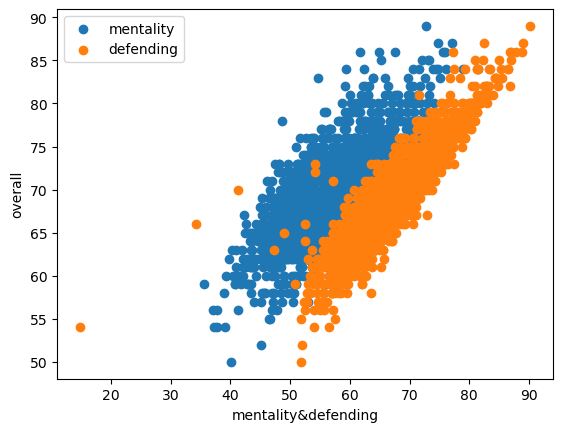

In [336]:
plt.scatter(X_train['mentality'], y_train, label='mentality')
plt.scatter(X_train['defending'], y_train, label='defending')
# plt.plot(new_data, pre_y, color='r', label='reg line')
plt.xlabel('mentality&defending')
plt.ylabel('overall')
plt.legend()

## [미드필더 선형모형 예측]

In [337]:
mid_DF.corr()

,overall,attacking,skill,movement,mentality,defending,power,MID
overall,1.000000,0.771180,0.758052,0.366547,0.756441,0.259445,0.590860,NaN
attacking,0.771180,1.000000,0.816958,0.342569,0.671884,0.011624,0.580268,NaN
skill,0.758052,0.816958,1.000000,0.361251,0.684596,0.047423,0.455451,NaN
movement,0.366547,0.342569,0.361251,1.000000,0.059750,-0.338817,0.089093,NaN
mentality,0.756441,0.671884,0.684596,0.059750,1.000000,0.577832,0.682275,NaN
defending,0.259445,0.011624,0.047423,-0.338817,0.577832,1.000000,0.382275,NaN
power,0.590860,0.580268,0.455451,0.089093,0.682275,0.382275,1.000000,NaN
MID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [338]:
feature_mid=mid_DF[['attacking', 'skill', 'mentality']]
feature_mid

,attacking,skill,mentality
4,81.4,74.000000,82.666667
10,65.0,56.500000,78.666667
14,69.4,61.666667,80.500000
19,77.4,67.833333,77.833333
24,79.6,72.333333,77.833333
...,...,...,...
14718,45.0,39.833333,49.333333
14723,41.2,37.166667,52.166667
14836,44.2,39.166667,40.833333
14912,45.4,42.166667,47.833333


In [339]:
target_mid=mid_DF.overall

In [340]:
target_mid

4        91
10       90
14       89
19       89
24       88
         ..
14718    54
14723    54
14836    53
14912    53
14960    52
Name: overall, Length: 2476, dtype: int64

In [341]:
X_train, X_test, y_train, y_test = train_test_split(feature_mid, target_mid, test_size=0.2, random_state=10)

In [342]:
reg=LinearRegression()

In [343]:
reg.fit(feature_mid, target_mid)

LinearRegression()

In [344]:
reg.coef_

array([0.262692  , 0.19272117, 0.30157948])

In [345]:
reg.intercept_

24.908226622104934

In [346]:
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

In [347]:
f' 훈련 결과 점수 : {train_score}, 테스트 결과 점수 : {test_score}'

' 훈련 결과 점수 : 0.7083187242393651, 테스트 결과 점수 : 0.735956881836989'

In [348]:
new_data=feature_mid

In [349]:
# new_data = new_data.reshape(-1,2)

In [350]:
X_train_flattened = X_train.values.ravel()

In [351]:
X_train_flattened.shape

(5940,)

In [352]:
X_train.shape

(1980, 3)

In [353]:
new_data.shape

(2476, 3)

In [354]:
y_train.shape

(1980,)

In [355]:
pre_y=reg.predict(new_data)

In [356]:
pre_y1=pre_y.reshape(-1,1)

In [357]:
pre_y2=pd.DataFrame(pre_y1)

In [358]:
pre_y2

,0
0,85.483292
1,76.596205
2,79.300672
3,81.786443
4,83.231611
...,...
2471,59.284014
2472,58.626337
2473,56.381954
2474,59.386405


In [359]:
for_prey1=pd.concat([for_mid, pre_y2], axis=1)

In [360]:
for_prey1=for_prey1.set_index('index')

In [361]:
for_prey1=for_prey1.rename(columns={0:'pre_overall'})
for_prey1

,overall,pre_overall
index,,
4,91,85.483292
10,90,76.596205
14,89,79.300672
19,89,81.786443
24,88,83.231611
...,...,...
14718,54,59.284014
14723,54,58.626337
14836,53,56.381954


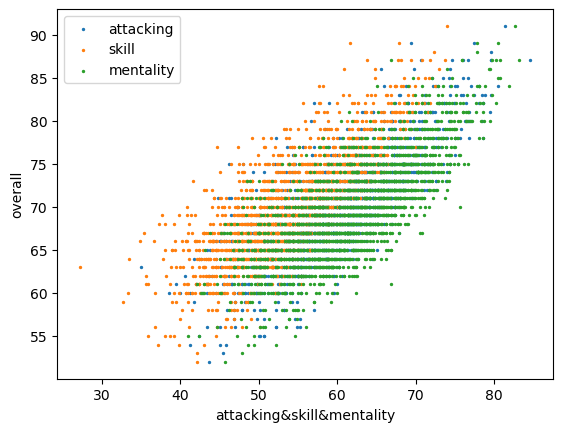

In [362]:
plt.scatter(X_train['attacking'], y_train, label='attacking',s=2)
plt.scatter(X_train['skill'], y_train, label= 'skill',s=2)
plt.scatter(X_train['mentality'], y_train, label='mentality',s=2)
# plt.plot(X_train, pre_y, color='r', label='reg line')
plt.xlabel('attacking&skill&mentality')
plt.ylabel('overall')
plt.legend()

In [363]:
from sklearn.preprocessing import PolynomialFeatures

In [364]:
# 차수 변수
n_degree = 3

In [365]:
# (1) 객체 생성
poly=PolynomialFeatures(degree=n_degree)

In [366]:
# (2) 생성된 다항특성객체에 학습 진행 ===> 주어진 데이터의 피쳐를 2차원 변형
# => x, x^2 , 1
poly.fit(X_train, X_test)

PolynomialFeatures(degree=3)

In [367]:
# (3) 변형하기
poly_train=poly.transform(X_train)
poly_test=poly.transform(X_test)

In [368]:
# 입력한 피쳐 확인
print(poly.n_features_in_)

# 생성된 피쳐 확인
print(poly.n_output_features_)

3
20


In [369]:
# 변형 전후 형태(shape) 확인
print(f'전 {X_train.shape} => 후 {poly_train.shape}')

전 (1980, 3) => 후 (1980, 20)


In [370]:
X_train.shape

(1980, 3)

In [371]:
poly_train[:1]

array([[1.00000000e+00, 6.80000000e+01, 6.43333333e+01, 7.13333333e+01,
        4.62400000e+03, 4.37466667e+03, 4.85066667e+03, 4.13877778e+03,
        4.58911111e+03, 5.08844444e+03, 3.14432000e+05, 2.97477333e+05,
        3.29845333e+05, 2.81436889e+05, 3.12059556e+05, 3.46014222e+05,
        2.66261370e+05, 2.95232815e+05, 3.27356593e+05, 3.62975704e+05]])

In [372]:
reg=LinearRegression()

In [373]:
reg.fit(feature_mid, target_mid)

LinearRegression()

In [374]:
reg.coef_

array([0.262692  , 0.19272117, 0.30157948])

In [375]:
reg.intercept_

24.908226622104934

In [376]:
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

In [377]:
f' 훈련 결과 점수 : {train_score}, 테스트 결과 점수 : {test_score}'

' 훈련 결과 점수 : 0.7083187242393651, 테스트 결과 점수 : 0.735956881836989'

In [378]:
from sklearn.linear_model import Ridge, Lasso

In [379]:
# 규제 강도 변수
alpha_ = 10000

In [380]:
# Ridge 학습 모델 객체 생성
rgModel = Ridge(alpha=alpha_)

In [381]:
# 학습 진행 => Loss/Cost func() 에서 나온 오차 + (알파*W**2)
rgModel.fit(poly_train, y_train)

Ridge(alpha=10000)

In [382]:
# 평가 진행
rgModel.score(poly_train, y_train)
rgModel.score(poly_test, y_test)

0.7876410394955393

In [383]:
train_score, test_score

(0.7083187242393651, 0.735956881836989)

## [공격수 선형회귀 예측]

In [384]:
fw_DF.corr()

,overall,attacking,skill,movement,power,mentality,defending,FW
overall,1.000000,0.504556,0.496734,0.374036,0.584292,0.566228,0.204593,NaN
attacking,0.504556,1.000000,0.930174,0.739595,0.851113,0.903612,0.312208,NaN
skill,0.496734,0.930174,1.000000,0.772185,0.767519,0.905625,0.400873,NaN
movement,0.374036,0.739595,0.772185,1.000000,0.597337,0.675359,0.230135,NaN
power,0.584292,0.851113,0.767519,0.597337,1.000000,0.838211,0.318738,NaN
mentality,0.566228,0.903612,0.905625,0.675359,0.838211,1.000000,0.564935,NaN
defending,0.204593,0.312208,0.400873,0.230135,0.318738,0.564935,1.000000,NaN
FW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [385]:
fw_DF

,overall,attacking,skill,movement,power,mentality,defending,FW
0,93,85.8,79.000000,90.2,77.8,73.833333,28.25,1
1,92,86.0,68.500000,81.6,84.8,80.666667,35.00,1
2,91,87.6,70.500000,85.4,87.2,74.333333,28.50,1
3,91,80.6,75.166667,90.2,71.8,77.000000,33.25,1
6,91,82.2,68.166667,92.4,82.2,73.500000,32.00,1
...,...,...,...,...,...,...,...,...
15081,47,12.4,11.666667,34.0,35.4,17.166667,10.00,1
15082,47,39.2,33.500000,62.4,48.2,47.166667,41.50,1
15083,47,41.0,34.500000,54.0,41.4,40.666667,25.25,1
15084,47,43.2,36.500000,60.0,48.8,46.500000,42.25,1


In [386]:
'attacking', 'skill', 'movement','power' ,'mentality','defending'

('attacking', 'skill', 'movement', 'power', 'mentality', 'defending')

In [387]:
feature_fw=fw_DF[['attacking','skill', 'movement','power', 'mentality','defending']]
feature_fw

,attacking,skill,movement,power,mentality,defending
0,85.8,79.000000,90.2,77.8,73.833333,28.25
1,86.0,68.500000,81.6,84.8,80.666667,35.00
2,87.6,70.500000,85.4,87.2,74.333333,28.50
3,80.6,75.166667,90.2,71.8,77.000000,33.25
6,82.2,68.166667,92.4,82.2,73.500000,32.00
...,...,...,...,...,...,...
15081,12.4,11.666667,34.0,35.4,17.166667,10.00
15082,39.2,33.500000,62.4,48.2,47.166667,41.50
15083,41.0,34.500000,54.0,41.4,40.666667,25.25
15084,43.2,36.500000,60.0,48.8,46.500000,42.25


In [388]:
target_fw=fw_DF['overall']

In [389]:
target_fw

0        93
1        92
2        91
3        91
6        91
         ..
15081    47
15082    47
15083    47
15084    47
15085    47
Name: overall, Length: 9590, dtype: int64

In [390]:
X_train, X_test, y_train, y_test = train_test_split(feature_fw, target_fw, test_size=0.5, random_state=10)

In [391]:
y_train.shape, X_train.shape, X_test.shape, y_test.shape

((4795,), (4795, 6), (4795, 6), (4795,))

In [392]:
from sklearn.preprocessing import PolynomialFeatures

In [393]:
# 차수 변수
n_degree = 3

In [394]:
# (1) 객체 생성
poly=PolynomialFeatures(degree=n_degree)

In [395]:
# (2) 생성된 다항특성객체에 학습 진행 ===> 주어진 데이터의 피쳐를 2차원 변형
# => x, x^2 , 1
poly.fit(feature_fw, target_fw)

PolynomialFeatures(degree=3)

In [396]:
# (3) 변형하기
poly_train=poly.transform(feature_fw)
poly_test=poly.transform(X_test)

In [397]:
# 입력한 피쳐 확인
print(poly.n_features_in_)

# 생성된 피쳐 확인
print(poly.n_output_features_)

6
84


In [398]:
# 변형 전후 형태(shape) 확인
print(f'전 {X_train.shape} => 후 {poly_train.shape}')

전 (4795, 6) => 후 (9590, 84)


In [399]:
X_train.shape

(4795, 6)

In [400]:
poly_train.shape

(9590, 84)

In [401]:
reg=LinearRegression()

In [402]:
reg.fit(poly_train, target_fw)

LinearRegression()

In [403]:
reg.coef_

array([ 7.17754763e-11,  1.08145743e+00, -1.17690366e+00,  9.55738744e-02,
       -8.72277403e-01,  3.56073368e-01, -2.26490222e-01, -1.95351644e-03,
        4.57243777e-02, -2.85764359e-02, -3.43355643e-02, -4.98522785e-02,
        3.69376738e-02, -3.20045518e-03, -9.95282199e-03,  5.29132275e-02,
       -4.39888701e-02, -1.43589528e-03, -1.38392020e-02,  4.28726446e-02,
        1.78943641e-02, -1.27592966e-02,  5.02751507e-03, -3.22030129e-02,
        1.12207575e-02,  6.09037133e-02, -2.01699440e-02, -7.78300632e-03,
        1.82410087e-04,  4.16879637e-04,  1.35242580e-04,  6.77199022e-05,
       -1.85418637e-04, -6.53243419e-04, -2.50588981e-04,  1.91938327e-04,
        7.32635255e-06, -2.25265747e-03,  8.58321351e-04,  1.64582594e-04,
       -7.25545594e-04,  5.75108514e-04,  3.87784905e-05,  2.91597475e-04,
        4.37692632e-04,  9.96954184e-05,  9.13189153e-04, -1.19197208e-04,
       -5.26258162e-05,  5.81361797e-04, -4.69912378e-04, -3.34481843e-04,
        3.83346284e-05, -

In [404]:
reg.intercept_

60.32629631801868

In [405]:
train_score = reg.score(poly_train, target_fw)
test_score = reg.score(poly_test, y_test)

In [406]:
f' 훈련 결과 점수 : {train_score}, 테스트 결과 점수 : {test_score}'

' 훈련 결과 점수 : 0.8265963688743878, 테스트 결과 점수 : 0.8322967729333861'

In [407]:
new_data=feature_fw

In [408]:
new_data

,attacking,skill,movement,power,mentality,defending
0,85.8,79.000000,90.2,77.8,73.833333,28.25
1,86.0,68.500000,81.6,84.8,80.666667,35.00
2,87.6,70.500000,85.4,87.2,74.333333,28.50
3,80.6,75.166667,90.2,71.8,77.000000,33.25
6,82.2,68.166667,92.4,82.2,73.500000,32.00
...,...,...,...,...,...,...
15081,12.4,11.666667,34.0,35.4,17.166667,10.00
15082,39.2,33.500000,62.4,48.2,47.166667,41.50
15083,41.0,34.500000,54.0,41.4,40.666667,25.25
15084,43.2,36.500000,60.0,48.8,46.500000,42.25


In [409]:
# new_data = new_data.reshape(-1,1)

In [410]:
X_train_flattened = X_train.values.ravel()

In [411]:
X_train_flattened.shape

(28770,)

In [412]:
X_train.shape

(4795, 6)

In [413]:
y_train.shape

(4795,)

In [414]:
new_data.shape

(9590, 6)

In [415]:
# new_data.T.iloc[1].shape

In [416]:
pre_y=reg.predict(poly_train)

In [417]:
pre_y.shape

(9590,)

In [418]:
# pre_y=reg.predict(new_data)

In [419]:
pre_y.shape

(9590,)

In [420]:
pre_y2.shape

(2476, 1)

In [421]:
new_data.shape

(9590, 6)

In [422]:
pre_y1=pre_y.reshape(-1,1)

In [423]:
pre_y2=pd.DataFrame(pre_y1)

In [424]:
pre_y2

,0
0,103.527954
1,94.490629
2,99.610405
3,96.734964
4,94.556335
...,...
9585,59.347590
9586,56.017337
9587,53.995343
9588,55.469514


In [425]:
for_prey2=pd.concat([for_fw, pre_y2], axis=1)

In [426]:
for_prey2=for_prey2.set_index('index')

In [427]:
for_prey2=for_prey2.rename(columns={0:'pre_overall'})
for_prey2

,overall,pre_overall
index,,
0,93,103.527954
1,92,94.490629
2,91,99.610405
3,91,96.734964
6,91,94.556335
...,...,...
15081,47,59.347590
15082,47,56.017337
15083,47,53.995343


In [428]:
poly_gra=poly_train[0]

In [429]:
poly_train

array([[1.00000000e+00, 8.58000000e+01, 7.90000000e+01, ...,
        1.54000951e+05, 5.89236146e+04, 2.25452656e+04],
       [1.00000000e+00, 8.60000000e+01, 6.85000000e+01, ...,
        2.27748889e+05, 9.88166667e+04, 4.28750000e+04],
       [1.00000000e+00, 8.76000000e+01, 7.05000000e+01, ...,
        1.57475167e+05, 6.03772500e+04, 2.31491250e+04],
       ...,
       [1.00000000e+00, 4.10000000e+01, 3.45000000e+01, ...,
        4.17578889e+04, 2.59275417e+04, 1.60984531e+04],
       [1.00000000e+00, 4.32000000e+01, 3.65000000e+01, ...,
        9.13550625e+04, 8.30054062e+04, 7.54188906e+04],
       [1.00000000e+00, 4.00000000e+01, 3.68333333e+01, ...,
        7.72171875e+04, 7.76714062e+04, 7.81282969e+04]])

In [430]:
poly_train.T[0].flatten().shape

(9590,)

In [431]:
pre_y.flatten().shape

(9590,)

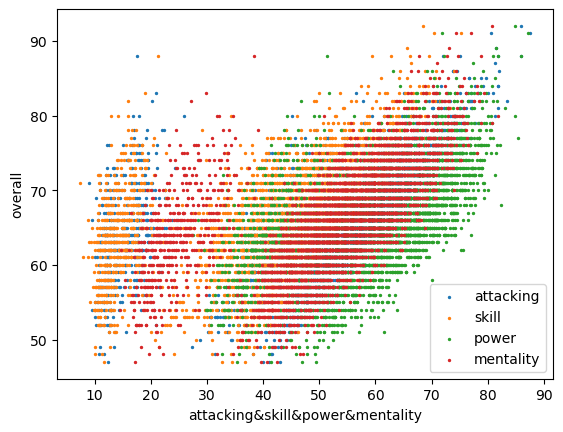

In [432]:
plt.scatter(X_train['attacking'], y_train, label='attacking',s=2)
plt.scatter(X_train['skill'], y_train, label='skill',s=2)
plt.scatter(X_train['power'], y_train, label='power',s=2)
plt.scatter(X_train['mentality'], y_train, label='mentality',s=2)
# plt.plot(poly_train.T[1].flatten(), pre_y.flatten(), color='r', label='reg line')
plt.xlabel('attacking&skill&power&mentality')
plt.ylabel('overall')
plt.legend()

## [골키퍼 선형회귀 예측]


In [433]:
gk_DF.corr()

,overall,skill,movement,mentality,defending,power,goalkeeping,GK
overall,1.000000,0.172325,0.348496,0.313807,0.131495,0.390995,0.244695,NaN
skill,0.172325,1.000000,0.792889,0.912892,0.827259,0.838678,-0.871954,NaN
movement,0.348496,0.792889,1.000000,0.807923,0.646227,0.829077,-0.615176,NaN
mentality,0.313807,0.912892,0.807923,1.000000,0.822644,0.878328,-0.752393,NaN
defending,0.131495,0.827259,0.646227,0.822644,1.000000,0.744210,-0.750840,NaN
power,0.390995,0.838678,0.829077,0.878328,0.744210,1.000000,-0.654733,NaN
goalkeeping,0.244695,-0.871954,-0.615176,-0.752393,-0.750840,-0.654733,1.000000,NaN
GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [434]:
gk_DF

,overall,skill,movement,mentality,defending,power,goalkeeping,GK
5,91,18.333333,61.4,34.666667,19.000000,53.6,87.4,1
7,90,28.333333,57.4,43.000000,12.666667,56.8,88.8,1
8,90,24.166667,51.2,40.166667,16.000000,53.6,87.8,1
11,89,68.000000,78.8,75.500000,31.000000,80.6,8.2,1
12,89,18.500000,57.0,31.333333,18.000000,49.8,84.2,1
...,...,...,...,...,...,...,...,...
14508,56,11.000000,40.6,15.833333,11.333333,35.0,55.4,1
14635,55,9.833333,33.0,18.500000,11.333333,31.0,54.0,1
14822,54,14.000000,34.0,25.333333,13.333333,38.4,53.8,1
14845,53,13.166667,36.2,20.166667,13.666667,36.6,52.6,1


In [435]:
'attacking', 'skill', 'movement','power' ,'mentality','defending'

('attacking', 'skill', 'movement', 'power', 'mentality', 'defending')

In [436]:
feature_gk=gk_DF[['movement','power', 'mentality','goalkeeping']]
feature_gk

,movement,power,mentality,goalkeeping
5,61.4,53.6,34.666667,87.4
7,57.4,56.8,43.000000,88.8
8,51.2,53.6,40.166667,87.8
11,78.8,80.6,75.500000,8.2
12,57.0,49.8,31.333333,84.2
...,...,...,...,...
14508,40.6,35.0,15.833333,55.4
14635,33.0,31.0,18.500000,54.0
14822,34.0,38.4,25.333333,53.8
14845,36.2,36.6,20.166667,52.6


In [437]:
target_gk=gk_DF['overall']

In [438]:
target_gk

5        91
7        90
8        90
11       89
12       89
         ..
14508    56
14635    55
14822    54
14845    53
14875    53
Name: overall, Length: 698, dtype: int64

In [439]:
X_train, X_test, y_train, y_test = train_test_split(feature_gk, target_gk, test_size=0.5, random_state=10)

In [440]:
y_train

8460    66
8839    66
4201    71
2106    74
2898    73
        ..
5283    69
4502    70
8537    66
1348    76
3460    72
Name: overall, Length: 349, dtype: int64

In [441]:
from sklearn.preprocessing import PolynomialFeatures

In [442]:
# 차수 변수
n_degree = 2

In [443]:
# (1) 객체 생성
poly=PolynomialFeatures(degree=n_degree)

In [444]:
# (2) 생성된 다항특성객체에 학습 진행 ===> 주어진 데이터의 피쳐를 2차원 변형
# => x, x^2 , 1
poly.fit(feature_gk, target_gk)

PolynomialFeatures()

In [445]:
# (3) 변형하기
poly_train=poly.transform(feature_gk)
poly_test=poly.transform(X_test)

In [446]:
# 입력한 피쳐 확인
print(poly.n_features_in_)

# 생성된 피쳐 확인
print(poly.n_output_features_)

4
15


In [447]:
# 변형 전후 형태(shape) 확인
print(f'전 {X_train.shape} => 후 {poly_train.shape}')

전 (349, 4) => 후 (698, 15)


In [448]:
X_train.shape

(349, 4)

In [449]:
poly_train[:1]

array([[1.00000000e+00, 6.14000000e+01, 5.36000000e+01, 3.46666667e+01,
        8.74000000e+01, 3.76996000e+03, 3.29104000e+03, 2.12853333e+03,
        5.36636000e+03, 2.87296000e+03, 1.85813333e+03, 4.68464000e+03,
        1.20177778e+03, 3.02986667e+03, 7.63876000e+03]])

In [450]:
reg=LinearRegression()

In [451]:
reg.fit(poly_train, target_gk)

LinearRegression()

In [452]:
reg.coef_

array([ 0.        ,  0.1169641 ,  0.36095003,  0.34972087,  0.14048644,
        0.00089025, -0.0022054 ,  0.00407306, -0.00280873,  0.00182049,
       -0.00605828, -0.00362449,  0.00359157, -0.00719053,  0.0099038 ])

In [453]:
reg.intercept_

14.199077923940273

In [454]:
train_score = reg.score(poly_train, target_gk)
test_score = reg.score(poly_test, y_test)

In [455]:
f' 훈련 결과 점수 : {train_score}, 테스트 결과 점수 : {test_score}'

' 훈련 결과 점수 : 0.9522631232262229, 테스트 결과 점수 : 0.9423844268317313'

In [456]:
new_data=feature_gk

In [457]:
new_data

,movement,power,mentality,goalkeeping
5,61.4,53.6,34.666667,87.4
7,57.4,56.8,43.000000,88.8
8,51.2,53.6,40.166667,87.8
11,78.8,80.6,75.500000,8.2
12,57.0,49.8,31.333333,84.2
...,...,...,...,...
14508,40.6,35.0,15.833333,55.4
14635,33.0,31.0,18.500000,54.0
14822,34.0,38.4,25.333333,53.8
14845,36.2,36.6,20.166667,52.6


In [458]:
# new_data = new_data.reshape(-1,2)

In [459]:
X_train_flattened = X_train.values.ravel()

In [460]:
X_train_flattened.shape

(1396,)

In [461]:
X_train.shape

(349, 4)

In [462]:
y_train.shape

(349,)

In [463]:
new_data.shape

(698, 4)

In [464]:
new_data.T.iloc[1].shape

(698,)

In [465]:
pre_y=reg.predict(poly_train)

In [466]:
pre_y.shape

(698,)

In [467]:
pre_y2=pre_y.reshape(-1,1)

In [468]:
pre_y3=pd.DataFrame(pre_y2)

In [469]:
pre_y3

,0
0,90.001213
1,90.483045
2,89.860834
3,83.254305
4,86.688076
...,...
693,56.369980
694,54.632266
695,55.448137
696,54.180130


In [470]:
for_prey3=pd.concat([for_gk, pre_y3], axis=1)

In [471]:
for_prey3=for_prey3.set_index('index')

In [472]:
for_prey3=for_prey3.rename(columns={0:'pre_overall'})
for_prey3

,overall,pre_overall
index,,
5,91,90.001213
7,90,90.483045
8,90,89.860834
11,89,83.254305
12,89,86.688076
...,...,...
14508,56,56.369980
14635,55,54.632266
14822,54,55.448137


In [473]:
poly_gra=poly_train[0]

In [474]:
poly_train

array([[1.00000000e+00, 6.14000000e+01, 5.36000000e+01, ...,
        1.20177778e+03, 3.02986667e+03, 7.63876000e+03],
       [1.00000000e+00, 5.74000000e+01, 5.68000000e+01, ...,
        1.84900000e+03, 3.81840000e+03, 7.88544000e+03],
       [1.00000000e+00, 5.12000000e+01, 5.36000000e+01, ...,
        1.61336111e+03, 3.52663333e+03, 7.70884000e+03],
       ...,
       [1.00000000e+00, 3.40000000e+01, 3.84000000e+01, ...,
        6.41777778e+02, 1.36293333e+03, 2.89444000e+03],
       [1.00000000e+00, 3.62000000e+01, 3.66000000e+01, ...,
        4.06694444e+02, 1.06076667e+03, 2.76676000e+03],
       [1.00000000e+00, 2.44000000e+01, 3.34000000e+01, ...,
        4.48027778e+02, 1.15570000e+03, 2.98116000e+03]])

In [475]:
poly_train.T[0].flatten().shape

(698,)

In [476]:
pre_y.flatten().shape

(698,)

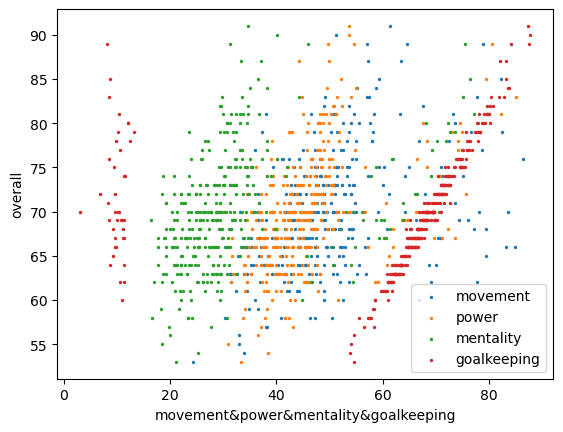

In [477]:
plt.scatter(X_train['movement'], y_train, label='movement',s=2)
plt.scatter(X_train['power'], y_train, label='power',s=2)
plt.scatter(X_train['mentality'], y_train, label='mentality',s=2)
plt.scatter(X_train['goalkeeping'], y_train, label='goalkeeping',s=2)
# plt.plot(poly_train.T[1].flatten(), pre_y.flatten(), color='r', label='reg line')
plt.xlabel('movement&power&mentality&goalkeeping')
plt.ylabel('overall')
plt.legend()

In [478]:
for_prey=for_prey.reset_index()
for_prey1=for_prey1.reset_index()
for_prey2=for_prey2.reset_index()
for_prey3=for_prey3.reset_index()

In [479]:
overall_df=pd.concat([for_prey, for_prey1], axis=0)

In [480]:
overall_df.duplicated().sum()

0

In [481]:
overall_df=pd.concat([overall_df, for_prey2], axis=0)

In [482]:
overall_df.duplicated().sum()

0

In [483]:
overall_df=pd.concat([overall_df, for_prey3], axis=0)
overall_df

,index,overall,pre_overall
0,15,89,86.924492
1,22,88,88.459787
2,39,87,86.725885
3,42,87,83.532495
4,44,87,82.045125
...,...,...,...
693,14508,56,56.369980
694,14635,55,54.632266
695,14822,54,55.448137
696,14845,53,54.180130


In [484]:
overall_df.duplicated().sum()

0

In [485]:
sorted_df = overall_df.sort_values(by='index')

In [486]:
sorted_df

,index,overall,pre_overall
0,0,93,103.527954
1,1,92,94.490629
2,2,91,99.610405
3,3,91,96.734964
0,4,91,85.483292
...,...,...,...
9585,15081,47,59.347590
9586,15082,47,56.017337
9587,15083,47,53.995343
9588,15084,47,55.469514


In [487]:
sorted_df['pre_overall'] = sorted_df['pre_overall'].round(0)

In [488]:
sorted_df=sorted_df.astype('int64')
sorted_df

,index,overall,pre_overall
0,0,93,104
1,1,92,94
2,2,91,100
3,3,91,97
0,4,91,85
...,...,...,...
9585,15081,47,59
9586,15082,47,56
9587,15083,47,54
9588,15084,47,55


In [ ]:
sorted_df.to_csv("player_overall23.csv")